In [87]:
import pandas as pd
import numpy as np

In [88]:

housing=pd.read_csv("/Users/raashidkhan/machine_learning_data.csv")

In [89]:
housing.info() 
housing.describe() #i think it only works for numeric data, as it skips last column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [90]:
housing_without_ocean_proximity=housing.drop(columns='ocean_proximity')

In [91]:
#here a very important information is revealed, that the median_house_value
#has a very strong correlation with median_income, here (0.688075)
housing_without_ocean_proximity.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<Axes: ylabel='Frequency'>

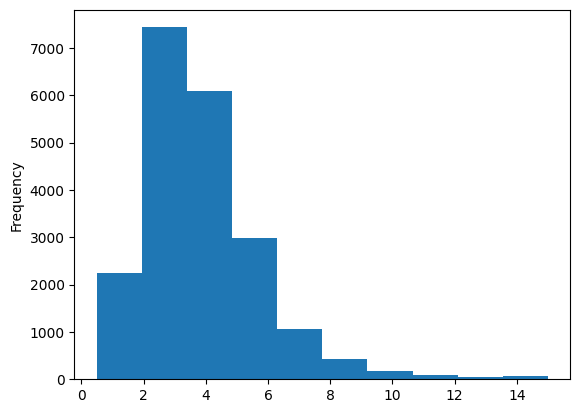

In [92]:
housing['median_income'].plot(kind='hist')
#here also, we see that almost 2000 people belong to median_income of very poor (0-2 median),
#and almost 1000-1500 people belong to income category of very rich (6-14 median_income)
# and most importantly which means that almost 18000 people out of 21000 people belong 
# to an income_category of 2-6

#But, what we observed, we need to categorize it actually:
#0-2: Poor
#2-6: Middle (85% People)
#6-12: Rich
#Categorizing will capture this nonlinear effect.

In [94]:
#Categorizing a continuos data
#This will help us in stratified sampling
#going to create 6 categories:
housing['new_income_categories']=pd.cut(housing['median_income'],bins=[0,1.5,3,4.5,6,7.5,np.inf],labels=[1,2,3,4,5,6])

new_income_categories
3    7236
2    6581
4    3639
5    1423
6     939
1     822
Name: count, dtype: int64


<Axes: >

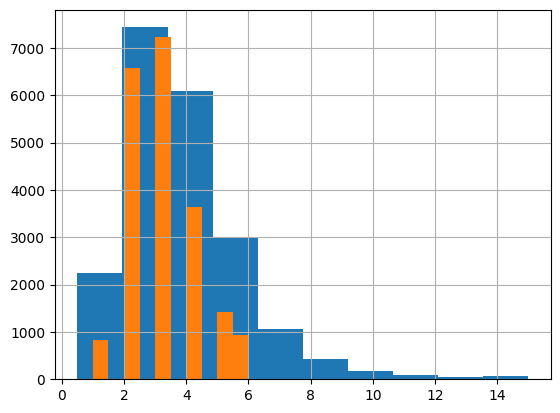

In [95]:
print (housing['new_income_categories'].value_counts())
housing['median_income'].hist()
housing['new_income_categories'].hist()

In [96]:
# for training it's a must that each column should be numeric


#also we need to make sure that there are no null values, because we wont be able 
#to train data

#we can split the data without encoder, but we wont be able to train it


housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   longitude              20640 non-null  float64 
 1   latitude               20640 non-null  float64 
 2   housing_median_age     20640 non-null  float64 
 3   total_rooms            20640 non-null  float64 
 4   total_bedrooms         20433 non-null  float64 
 5   population             20640 non-null  float64 
 6   households             20640 non-null  float64 
 7   median_income          20640 non-null  float64 
 8   median_house_value     20640 non-null  float64 
 9   ocean_proximity        20640 non-null  object  
 10  new_income_categories  20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [97]:
#so we see that:
    #total_bedrooms column has null values
    #ocean_proximity is an object column
# its very important to make ocean_proximity to numeric using OneHotEncoder
    #we cant use ordinalencoder as the data is nominal, not continuous
#also need to fill missing values in total_bedrooms using SimpleImputer


In [99]:
# now i shall create a list of numeric, and categoric columns separately
#so that I shall be able to use different models for different dtypes

num_cols = housing.select_dtypes(include=['float64', 'int64']).columns
cat_cols = housing.select_dtypes(include=['object']).columns

In [109]:
print (housing[num_cols].dtypes)
print (housing[cat_cols].dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object
ocean_proximity    object
dtype: object


In [110]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [111]:
#let me create a pipelines for numerical and categoric data
    #for numeric we only need simple imputer to check for missing values
        #(SimpleImputer)
    #but for categoric we need to fill missing values, and then make it numeric
        #(Simple Imputer and then OneHotEncoder)

In [117]:
numeric_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median'))])
categoric_pipeline=Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),
                            ('encoder',OneHotEncoder(handle_unknown='ignore'))])
#note that i used mode strategy for categoric fill, otherwise it would throw error

In [118]:
#now i shall use column transformer to specify the pipelines and their respective 
#columns to work upon

from sklearn.compose import ColumnTransformer

transformation_style=ColumnTransformer([("num",numeric_pipeline,num_cols),
                                        ('cat',categoric_pipeline,cat_cols)])

In [126]:
cleaned_data=transformation_style.fit_transform(housing)
cleaned_data
#once we get an output using transformation, it is an array
#it means that after we make it a dataframe, the column names will be absent


array([[-122.23,   37.88,   41.  , ...,    0.  ,    1.  ,    0.  ],
       [-122.22,   37.86,   21.  , ...,    0.  ,    1.  ,    0.  ],
       [-122.24,   37.85,   52.  , ...,    0.  ,    1.  ,    0.  ],
       ...,
       [-121.22,   39.43,   17.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.32,   39.43,   18.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.24,   39.37,   16.  , ...,    0.  ,    0.  ,    0.  ]],
      shape=(20640, 14))

In [130]:
#so it is a must that we retain column names
col_names = transformation_style.get_feature_names_out()
col_names

array(['num__longitude', 'num__latitude', 'num__housing_median_age',
       'num__total_rooms', 'num__total_bedrooms', 'num__population',
       'num__households', 'num__median_income', 'num__median_house_value',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN'], dtype=object)

In [129]:
cleaned=pd.DataFrame(cleaned_data,columns=col_names)
cleaned

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,num__median_house_value,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


*Now our dataframe is ready with all numeric values*

In [147]:
cleaned.to_csv('machine_learning_data_clean.csv',index=False)